# Introduction

In this lab, we will learn how to use hierarchical clustering to segment a 2D image. Hierarchical clustering is a clustering algorithm that groups similar data points together. In the context of image segmentation, hierarchical clustering can be used to group pixels with similar color intensities together, which can be useful in identifying distinct regions or objects in an image.

We will use Python's scikit-learn library to perform hierarchical clustering on an image of coins.

# Generate Data

We will start by generating the data. We will use scikit-image's **coins** dataset, which is a 2D grayscale image of coins. We will resize the image to 20% of the original size to speed up the processing.

In [4]:
from skimage.data import coins
import numpy as np
from scipy.ndimage import gaussian_filter
from skimage.transform import rescale

orig_coins = coins()

# Resize it to 20% of the original size to speed up the processing
# Applying a Gaussian filter for smoothing prior to down-scaling
# reduces aliasing artifacts.

smoothened_coins = gaussian_filter(orig_coins, sigma=2)
rescaled_coins = rescale(
    smoothened_coins,
    0.2,
    mode="reflect",
    anti_aliasing=False,
)

X = np.reshape(rescaled_coins, (-1, 1))

# Define Structure of the Data

Pixels in an image are connected to their neighbors. In order to perform hierarchical clustering on an image, we need to define the structure of the data. We can use scikit-learn's **grid_to_graph** function to create a connectivity matrix that defines the structure of the data.

In [5]:
from sklearn.feature_extraction.image import grid_to_graph

connectivity = grid_to_graph(*rescaled_coins.shape)

# Compute Clustering

With the data and connectivity matrix defined, we can now perform hierarchical clustering. We will use scikit-learn's **AgglomerativeClustering** class to perform clustering. We will set the number of clusters to 27, which is the number of coins in the image. We will use the "ward" linkage method, which minimizes the variance of the distances between the clusters being merged. We will also pass in the connectivity matrix we created in step 2.

In [6]:
from sklearn.cluster import AgglomerativeClustering
import time as time

print("Compute structured hierarchical clustering...")
st = time.time()
n_clusters = 27  # number of regions
ward = AgglomerativeClustering(
    n_clusters=n_clusters, linkage="ward", connectivity=connectivity
)
ward.fit(X)
label = np.reshape(ward.labels_, rescaled_coins.shape)
print(f"Elapsed time: {time.time() - st:.3f}s")
print(f"Number of pixels: {label.size}")
print(f"Number of clusters: {np.unique(label).size}")

Compute structured hierarchical clustering...
Elapsed time: 0.106s
Number of pixels: 4697
Number of clusters: 27


# Plot the Results

Finally, we can plot the results on an image. We will use matplotlib to plot the rescaled image and the contours of the clusters. We will loop through each cluster and plot the contour of the pixels in that cluster.

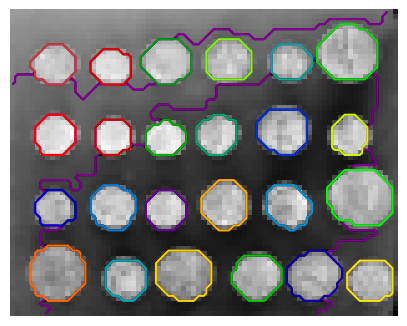

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.imshow(rescaled_coins, cmap=plt.cm.gray)
for l in range(n_clusters):
    plt.contour(
        label == l,
        colors=[
            plt.cm.nipy_spectral(l / float(n_clusters)),
        ],
    )
plt.axis("off")
plt.show()

# Summary

In this lab, we learned how to use hierarchical clustering to segment a 2D image. We generated the data, defined the structure of the data, performed hierarchical clustering, and plotted the results on an image. This technique can be useful in identifying distinct regions or objects in an image.